In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:/Users/vishal/Desktop/Heart Failure'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("Heart.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Checking the Nan Value
df.isnull().sum()
# No Nun Value is available

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.4 KB


In [6]:
df.DEATH_EVENT.unique()

array([1, 0], dtype=int64)

In [7]:
df.describe(percentiles=None, include=None, exclude=None)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# DecisionTree classifier

In [8]:
X = df.drop('DEATH_EVENT',axis=1)
y = df.DEATH_EVENT

In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [10]:
# Distribute the Train Test Split
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(209, 12)
(90, 12)
(209,)
(90,)


In [12]:
# Import the Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='log2',
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None
    )


In [13]:
clf_dt = clf.fit(X_train,y_train)

In [14]:
clfdt_pred = clf_dt.predict(X_test)

In [15]:
# Import the Score
from sklearn.model_selection import *
clf_dt.score(X_test,y_test)

0.8555555555555555

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Building Heat Map
from sklearn.metrics import confusion_matrix
# building heatmap
cf_matrix = confusion_matrix(y_test, clfdt_pred)
sns.heatmap(cf_matrix, cmap='Oranges',annot = True)
plt.show()

<Figure size 640x480 with 2 Axes>

In [17]:
cf_matrix

array([[59,  3],
       [10, 18]], dtype=int64)

# Gradient Boosting approach

In [18]:
x = df.loc[:,:"time"]
y = df.loc[:,["DEATH_EVENT"]]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [19]:
print(y_test.shape)

(60, 1)


In [20]:
from sklearn.ensemble import *
clf = RandomForestClassifier(max_depth=4,max_features="log2",random_state=1)
clf_random = clf.fit(x_train,y_train)

C:\Users\vishal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\vishal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
clfrandom_pred = clf_random.predict(x_test)
clf_random.score(x_test,y_test)

0.9

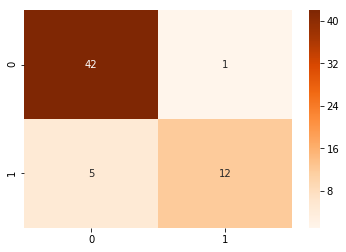

In [22]:
# building heatmap
cf_matrix = confusion_matrix(y_test, clfrandom_pred)
sns.heatmap(cf_matrix, cmap='Oranges',annot = True)

In [23]:

### Create a Pickle file using serialization 
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(clf_random, pickle_out)
pickle_out.close()

In [24]:
import numpy as np
clf_random.predict([[169.0,1,305,0,25,0,298000.00,1.10,141,1,87,1]])

array([1], dtype=int64)

In [25]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')